<a href="https://colab.research.google.com/github/Eshan16pandey/PCA-and-KNN-Task/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Zoo.csv')

In [31]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


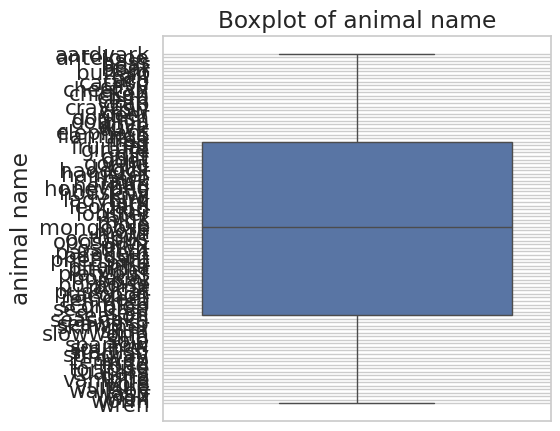

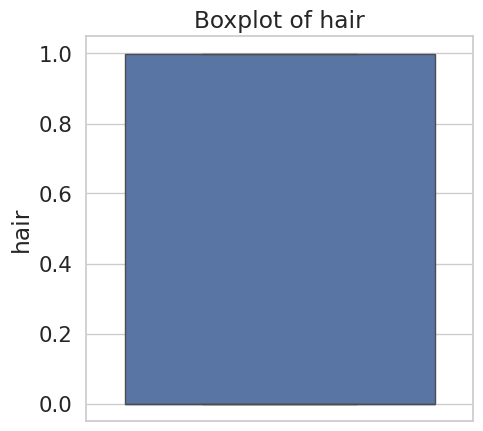

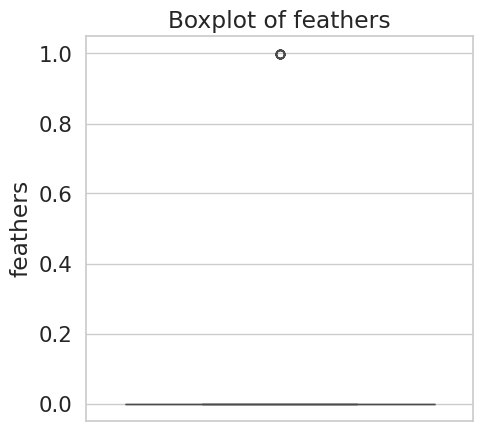

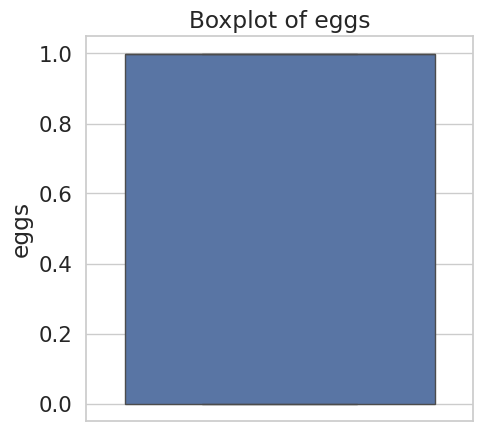

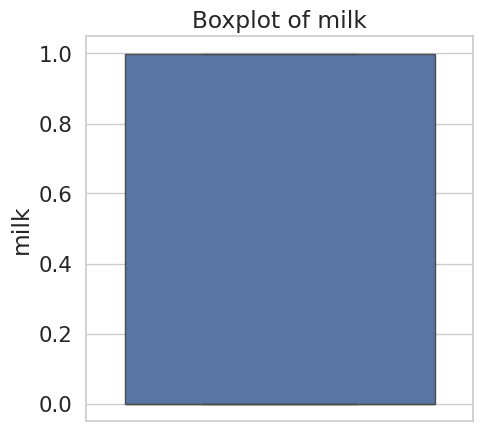

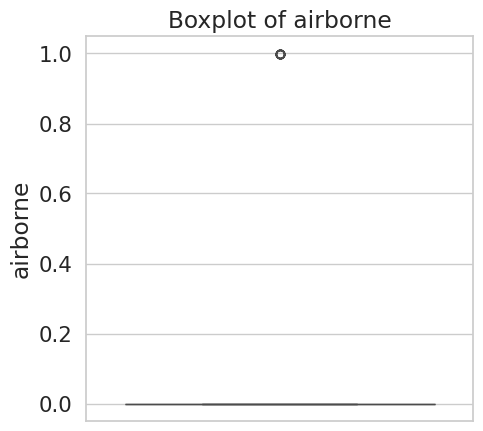

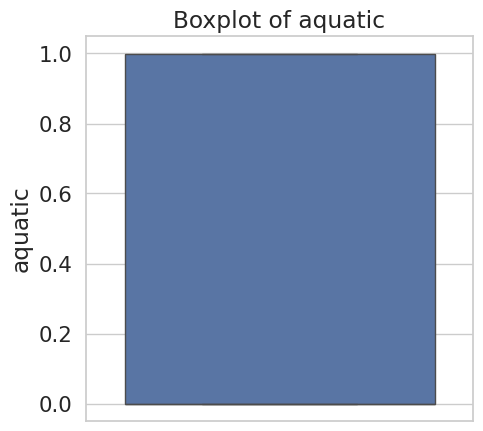

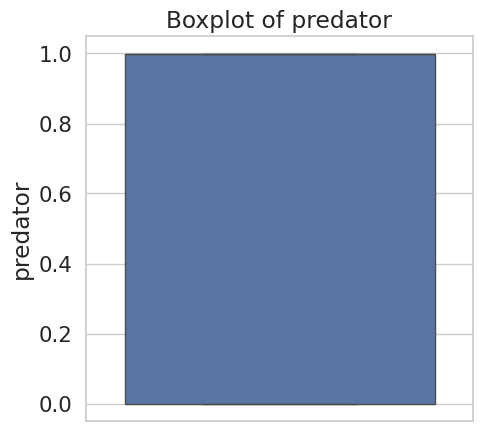

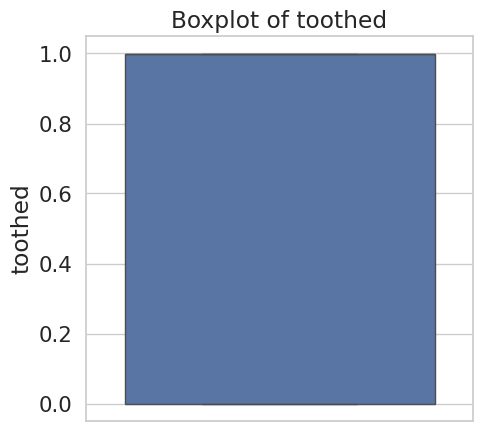

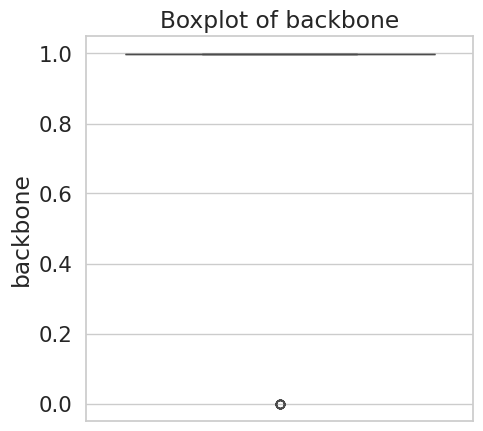

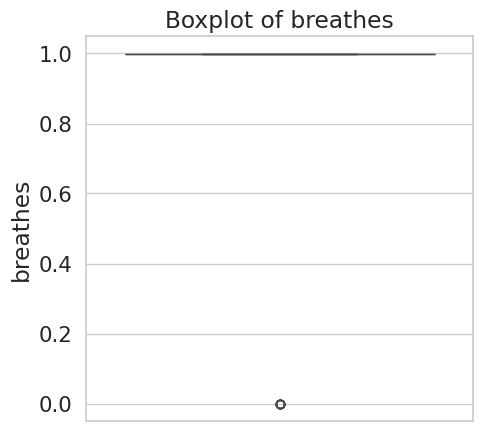

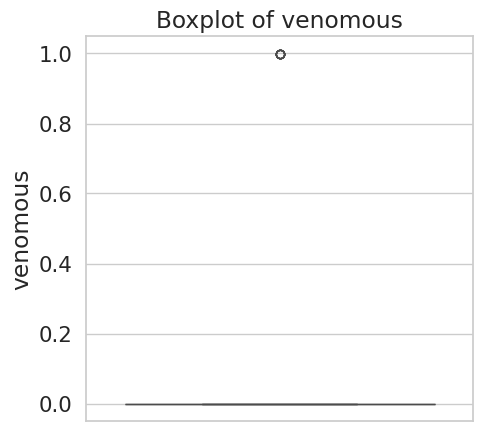

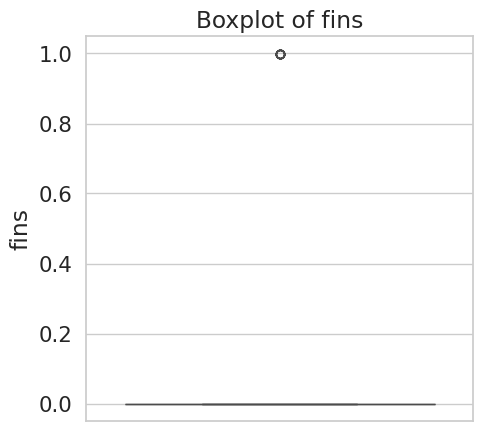

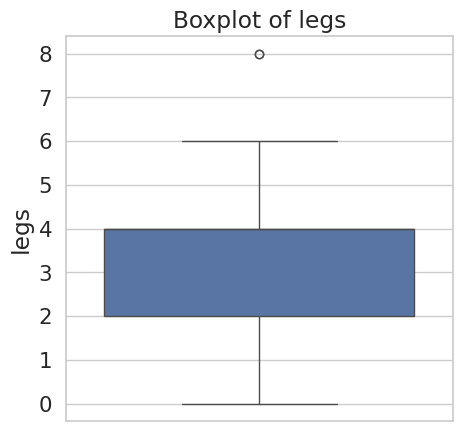

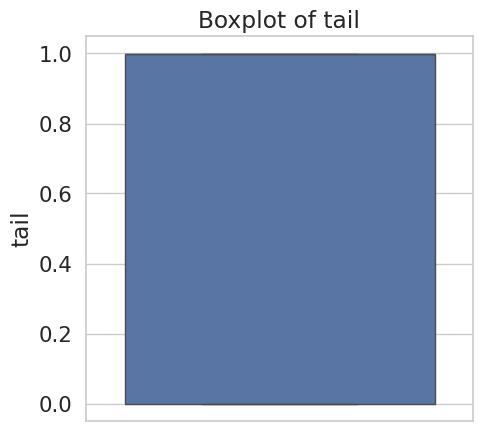

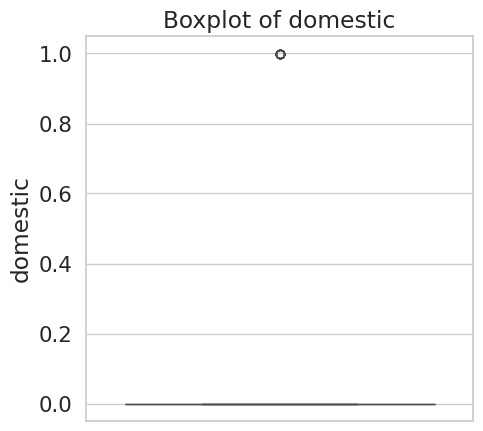

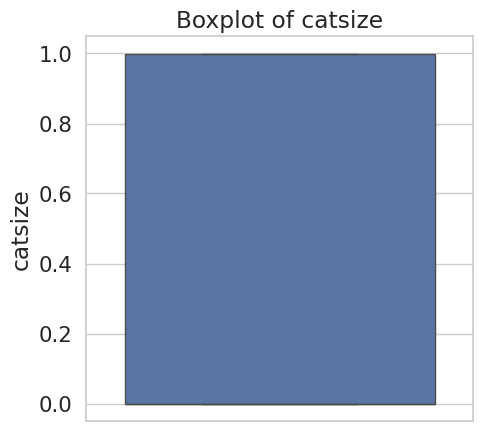

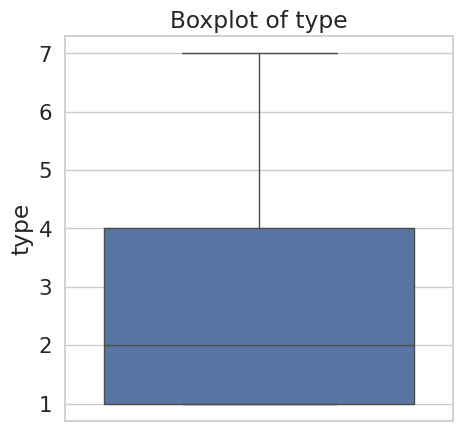

In [32]:
#checking the outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for column in df.columns:
  # Create a boxplot for each column
  plt.figure(figsize=(5, 5))
  sns.boxplot(y=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [69]:
# checking missing values, shape and info

# Check for missing values
print(df.isnull().sum())

# Print the shape of the DataFrame
print(df.shape)

# Print information about the DataFrame
print(df.info())


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
tail           0
domestic       0
catsize        0
type           0
legs_0         0
legs_2         0
legs_4         0
legs_5         0
legs_6         0
legs_8         0
dtype: int64
(101, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null

In [34]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


The boxplots highlight differences in the central tendencies, spread, and outlier distribution of various features.

For instance, the "legs" column shows a median of 4 with a relatively narrow interquartile range (IQR), suggesting that most animals in the dataset have 4 legs.
In contrast, the "tail" column exhibits a wider IQR and a higher maximum value, indicating greater variability in tail length across different animals.




In [35]:
# Create dummy variables for the 'legs' column
df = pd.get_dummies(df, columns=['legs'])

# Ensure the dummy variables are in numerical form
dummy_columns = df.columns[df.columns.str.startswith('legs_')]
df[dummy_columns] = df[dummy_columns].astype(int)

print(df)


    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  ...  tail  domestic  catsize  type  legs_0  legs_2  \
0        

In [36]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0


Now let's understand the target variable which is animal name, because our objective is to predict the type based on the variables we have.


In [37]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

The value counts of the "type" column suggest that the dataset is **imbalanced**.

There are significantly more animals of **type "Mammal" compared to "Bird" and "Reptile"**.

This imbalance should be addressed during model training and evaluation to ensure that the model doesn't become biased towards the majority class.


<ipython-input-38-ebdfdc4caed5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='type', data=df, palette='Dark2')


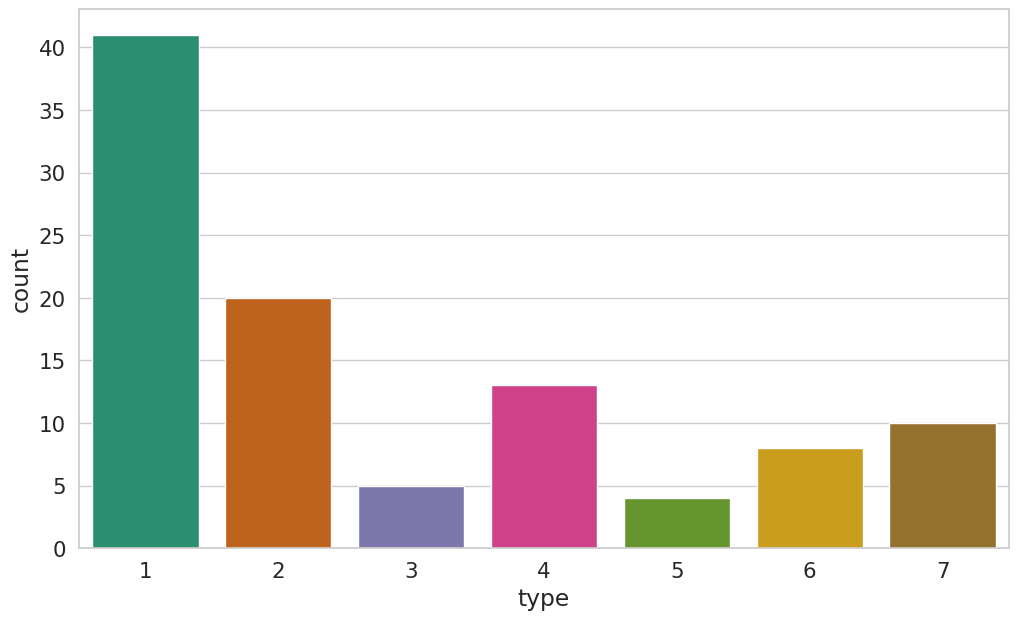

In [38]:
import seaborn as sn

# Set the style and font scale
sn.set(style='whitegrid', font_scale=1.4)

# Create a subplot with the specified size
plt.subplots(figsize=(12, 7))

# Plot using Seaborn countplot with a dark color palette
sn.countplot(x='type', data=df, palette='Dark2')

# Show the plot
plt.show()

We could see the count 1 has so much weightage

##**Now seperating the data** after that **Labeling the data and spliting them into train and test**

In [39]:
Y = df['type']

In [40]:
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [41]:
# Now we are removing the column animal_name

X = df.drop('animal name',axis=1)

In [42]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [43]:
# Now training the model and spliting it into test and train


from sklearn.model_selection import GridSearchCV,train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 30, stratify = Y)

In [44]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
20,0,1,1,0,1,0,0,0,1,1,...,1,1,0,2,0,1,0,0,0,0
64,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
90,0,0,1,0,0,0,0,0,1,1,...,1,0,1,3,0,0,1,0,0,0
59,0,1,1,0,1,0,0,0,1,1,...,1,0,0,2,0,1,0,0,0,0
30,0,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0


In [45]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
46,0,0,1,0,0,1,1,0,0,0,...,0,0,0,7,0,0,0,0,1,0
79,0,1,1,0,1,1,1,0,1,1,...,1,0,0,2,0,1,0,0,0,0
23,0,1,1,0,1,0,0,0,1,1,...,1,0,1,2,0,1,0,0,0,0
60,0,0,1,0,0,1,1,1,1,0,...,1,0,1,4,1,0,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0


In [46]:
Y_test.head()

46    7
79    2
23    2
60    4
97    6
Name: type, dtype: int64

In [47]:
Y_train.head()

20    2
64    1
90    3
59    2
30    6
Name: type, dtype: int64

##**Applying hyperparameter tuning**

In [48]:
#Grid search

from sklearn.model_selection import GridSearchCV
import numpy as np


n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


{'n_neighbors': 1}


##**Our n_neighbors is 1 hence we will use k = 1 for KNN CLassifier**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

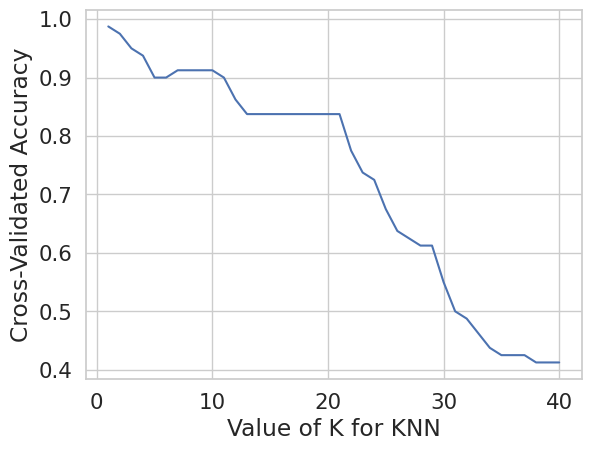

In [50]:
# Visualizing the results we have got

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score


# Selecting K between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulate different k in models, then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to visualize
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



The plot suggests that the optimal value for k is around 10. This is because the accuracy score starts to level off around this point, indicating that adding more neighbors does not significantly improve the model's performance.

**Using KNN Classifier for prediction**

In [51]:


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

1.0


The KNN classifier accuracy of 1.0 indicates that the model perfectly predicts the class labels of all data points in the test set.This is an unusually high accuracy score and may not be entirely realistic. still we will not reply on accuray score, hence confusion matrix is necessary.







In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [57]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21




##The classification report suggests that the KNN classifier with k=10 achieves the following performance on the test set:

The model correctly identifies 100% of the animals of type "Mammal".

The model correctly identifies 100% of the animals of type "Bird".

The model achieves a perfect F1-score of 1.0 for both classes, indicating a balance between precision and recall.

The classification report suggests that the KNN classifier with k=10 is a very effective model for classifying animals based on their features.

##**Now we will use oversampling as the the precison and f1 score for type 5 is low.**

In [61]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 30)



In [62]:
# Fiting the data To ROS

x_resample, y_resample = ros.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [63]:
y_df.value_counts()

type
1       41
2       41
3       41
4       41
5       41
6       41
7       41
Name: count, dtype: int64

In [64]:
# By applying this,  all the type values are 41 now.
#Previously only type 1 was 41.


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 30, stratify = y_resample)

##**We have to do Algorithm Tuning after resampling**

In [66]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': 1}


Therefore, we got the best K (n_neighbors) value as 1, which means  we could use the k= 1 for KNN Classifier algorithm.


##**Visualizing the accuracy with different k values on sampled data.**

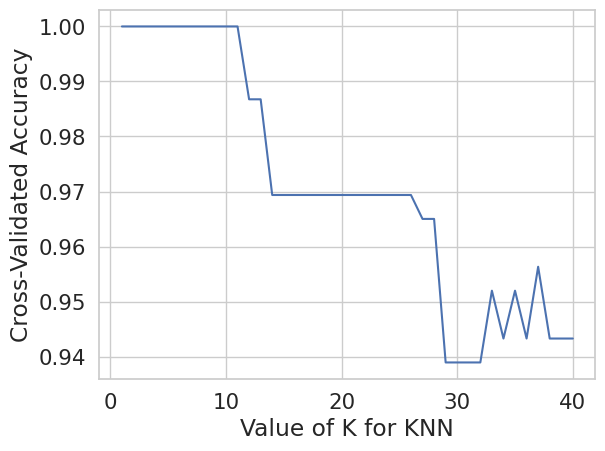

In [67]:
# Again choosing k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# visualizing the plot
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

The plot suggests that the optimal value for k is around 10. This is because the accuracy score starts to level off around this point, indicating that adding more neighbors does not significantly improve the model's performance.

Using KNN with k=1 for model classification

In [68]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)



from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)



print(classification_report(Y_test,y_pred))

1.0
[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58




The accuracy of 1.0 indicates that the model perfectly predicts the class labels of all data points in the test set. This is an unusually high accuracy score and may not be entirely realistic.

The confusion matrix shows that the model correctly identifies all instances of each class in the test set.

The classification report shows that the model achieves a perfect F1-score of 1.0 for each class, indicating a balance between precision and recall.

Furthermore, these metrics suggest that the KNN classifier with k=10 is a very effective model for classifying animals based on their features.